# Objective

You are required to change the ## MAIN BLOCK in such a way that it represents this architecture:
1. x1 = Input
2. x2 = Conv(x1)
3. x3 = Conv(x1 + x2)
4. x4 = MaxPooling(x1 + x2 + x3)
5. x5 = Conv(x4)
6. x6 = Conv(x4 + x5)
7. x7 = Conv(x4 + x5 + x6)
8. x8 = MaxPooling(x5 + x6 + x7)
9. x9 = Conv(x8)
10. x10 = Conv (x8 + x9)
11. x11 = Conv (x8 + x9 + x10)
12. BIG KERNEL Operation (use a large kernel size (10 units), if required at this step to be able to add softmax in the next layer)
13. SoftMax

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-06-14 10:40:54.673193


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-14 10:41:34.395951


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 0s 0us/step
2019-06-14 10:41:38.506839


(60000, 28, 28)
2019-06-14 10:41:40.822930


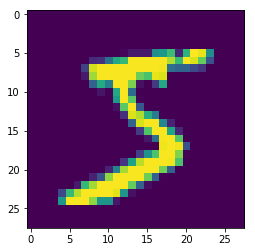

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-14 10:41:43.882397


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-14 10:41:46.773523


In [0]:
y_train[:10]
print(datetime.datetime.now())

2019-06-14 10:41:51.488447


In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-14 10:41:58.818745


In [0]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-14 10:42:00.923957


In [0]:
## MAIN BLOCK
from keras.layers import Activation
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate


#x1 = Input
x1 = Input(shape = (28, 28, 1))

#x2 = Conv(x1)
x2 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'x2_conv')(x1)

#x3 = Conv(x1 + x2)
x3_1 = concatenate([x1, x2], axis = -1)
x3 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'x3_conv')(x3_1)

#x4 = MaxPooling(x1 + x2 + x3)
x4_1 = concatenate([x1, x2, x3], axis = -1)
x4 = MaxPooling2D(pool_size = (2, 2))(x4_1)

#x5 = Conv(x4)
x5 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'x5_conv')(x4)

#x6 = Conv(x4 + x5)
x6_1 = concatenate([x4, x5], axis = -1)
x6 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'x6_conv')(x6_1)

#x7 = Conv(x4 + x5 + x6)
x7_1 = concatenate([x4, x5, x6], axis = -1)
x7 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'x7_conv')(x7_1)

#x8 = MaxPooling(x5 + x6 + x7)
x8_1 = concatenate([x5, x6, x7], axis = -1)
x8 = MaxPooling2D(pool_size=(2, 2))(x8_1)

#x9 = Conv(x8)
x9 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'x9_conv')(x8)

#x10 = Conv (x8 + x9)
x10_1 = concatenate([x8, x9], axis = -1)
x10 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'x10_conv')(x10_1)

#x11 = Conv (x8 + x9 + x10)
x11_1 = concatenate([x8, x9, x10], axis = -1)
x11 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same', name = 'x11_conv')(x11_1)

#BIG KERNEL Operation (use a large kernel size (10 units), if required at this step to be able to add softmax in the next layer)
x12 = Conv2D(10, (7,7), name = 'x12_Conv')(x11)


flat_layer = Flatten()(x12)
output = Activation('softmax')(flat_layer)

model = Model(inputs=[x1], outputs=[output])


print(datetime.datetime.now())

W0614 10:42:47.388835 140454907357056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



2019-06-14 10:42:47.492990


In [0]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
x2_conv (Conv2D)                (None, 28, 28, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 28, 28, 33)   0           input_2[0][0]                    
                                                                 x2_conv[0][0]                    
__________________________________________________________________________________________________
x3_conv (Conv2D)                (None, 28, 28, 32)   9536        concatenate_2[0][0]              
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

W0614 10:43:01.184131 140454907357056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 10:43:01.217817 140454907357056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



2019-06-14 10:43:01.236396


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0614 10:43:04.879681 140454907357056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 10:43:05.017939 140454907357056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.1089 - acc: 0.9657
Epoch 2/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.0383 - acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0262 - acc: 0.9919
Epoch 4/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0218 - acc: 0.9930
Epoch 5/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.0167 - acc: 0.9947
Epoch 6/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0129 - acc: 0.9958
Epoch 7/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0113 - acc: 0.9964
Epoch 8/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.0112 - acc: 0.9964
Epoch 9/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0097 - acc: 0.9970
Epoch 10/10
60000/60000 [==============================] - 15s 254us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-14 10:45:46.255322


In [0]:
print(score)
print(datetime.datetime.now())

[0.03520895965366176, 0.9917]
2019-06-14 10:45:46.267410
